> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset a Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pls 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [32]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()
#release_year needs to be converted to datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [33]:
# split cast members into multiple variables 
df[['Actor1', 'Actor2', 'Actor3', 'Actor4', 'Actor5']] = df["cast"].str.split("|", expand = True) 
df.drop('cast', axis=1, inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,Actor1,Actor2,Actor3,Actor4,Actor5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [35]:
# split genres into multiple columns
df[['genre1', 'genre2', 'genre3', 'genre4', 'genre5']] = df["genres"].str.split("|", expand = True) 
df.drop('genres', axis=1, inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,Actor1,Actor2,Actor3,Actor4,Actor5,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None


In [37]:
# split production companies into multiple columns 
df[['production1', 'production2', 'production3', 'production4', 'production5']] = df["production_companies"].str.split("|", expand = True) 
df.drop('production_companies', axis=1, inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,genre1,genre2,genre3,genre4,genre5,production1,production2,production3,production4,production5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 33 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
homepage          2936 non-null object
director          10822 non-null object
tagline           8042 non-null object
keywords          9373 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
Actor1            10790 non-null object
Actor2            10646 non-null object
Actor3            10556 non-null object
Actor4            10447 non-null object
Actor5          

In [42]:
# drop homepoage column
df.drop('homepage', axis=1, inplace=True)

KeyError: "['homepage'] not found in axis"

In [44]:
# drop rows with missing value in the director column
df.dropna(axis=0, subset=['director'], inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 32 columns):
id                10822 non-null int64
imdb_id           10816 non-null object
popularity        10822 non-null float64
budget            10822 non-null int64
revenue           10822 non-null int64
original_title    10822 non-null object
director          10822 non-null object
tagline           8032 non-null object
keywords          9357 non-null object
overview          10819 non-null object
runtime           10822 non-null int64
release_date      10822 non-null object
vote_count        10822 non-null int64
vote_average      10822 non-null float64
release_year      10822 non-null int64
budget_adj        10822 non-null float64
revenue_adj       10822 non-null float64
Actor1            10752 non-null object
Actor2            10614 non-null object
Actor3            10528 non-null object
Actor4            10420 non-null object
Actor5            10109 non-null object
genre1         

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

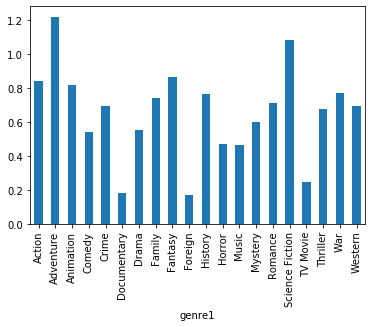

In [51]:
# is the average popularity connected to specific (main)genres? Assuming the first mentioned genre is the primary one
df.groupby('genre1')['popularity'].mean().plot(kind='bar');


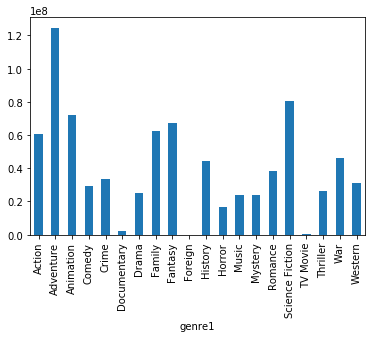

In [53]:
# is the average revenue connected to specific (main)genres? Assuming the first mentioned genre is the primary one
df.groupby('genre1')['revenue'].mean().plot(kind='bar');

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!